# ICAN clinical data simualtion 

**Objective:** sharing synthetic data in the context of the ICAN project to reproduce methods and graphics used in the paper.

In this notebook, we generate random values with probability distribtions close to the real ICAN dataset.

## Packages importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

## Clinical data simulation

In [2]:
FEATURES = ["rupture", "sex", "age", "bmi", "sporadic_case", "multiple_IA", "IA_location", "adjusted_size_ratio", 
            "tobacco", "alcohol", "hta", "headaches", "diabetes", "dyslipidemia", "ischemic_stroke_history", 
            "ischemic_heart_disease_history", "pad_history", "carotid_artery_stenosis_history", "aortic_aneurysm_history", 
            "statin_ttt", "platelet_aggregation_inhibiting_ttt", "vka_or_anticoagulant_ttt", "anti_inflammatory_ttt", 
            "hormone_therapy_ttt", "allergy", "asthma", "atopy", "eczema"] 

In [3]:
def yes_no_var(percentage_yes, nb_samples) :
    return np.random.choice(['Yes', 'No'], nb_samples, p=[percentage_yes, 1-percentage_yes])

In [4]:
np.random.seed(111)
df = pd.DataFrame()
nb_samples = 2505
nb_choice = 5000

for f in FEATURES :
    if "rupture" in f:
        df[f] = yes_no_var(0.397, nb_samples)
    
    if 'sex' in f:
        var = np.repeat(None, nb_samples)
        var[df[df.rupture == "Yes"].index] = np.random.choice(['M', 'F'], len(df[df.rupture == "Yes"]), p=[0.30, 0.70])
        var[df[df.rupture == "No"].index] = np.random.choice(['M', 'F'], len(df[df.rupture == "No"]), p=[0.27, 0.73])
        df[f] = var
        
    if 'age' in f:
        var = np.repeat(None, nb_samples)
        mean = 50.3 ; sd = 12.1 ; min_val = 18 ; max_val = 87
        random_nb = np.random.normal(loc = mean, scale = sd, size = nb_choice).astype(int)
        random_nb = random_nb[np.where((random_nb >= min_val)&(random_nb <= max_val))]
        var[df[df.rupture == "Yes"].index] = np.random.choice(random_nb, size = len(df[df.rupture == "Yes"]))
        mean = 55.8 ; sd = 11.9 ; min_val = 20 ; max_val = 85
        random_nb = np.random.normal(loc = mean, scale = sd, size = nb_choice).astype(int)
        random_nb_No = random_nb[np.where((random_nb >= min_val)&(random_nb <= max_val))]
        var[df[df.rupture == "No"].index] = np.random.choice(random_nb, size = len(df[df.rupture == "No"]))
        df[f] = var
        
    if 'bmi' in f:
        select_indiv = []
        mean = 25.4 ; sd = 4.8 ; min_val = 15.6 ; max_val = 54.8
        random_nb = np.random.normal(loc = mean, scale = sd, size = nb_choice).astype(int)
        random_nb2 = random_nb[np.where((random_nb >= min_val)&(random_nb <= max_val))]
        df[f] = np.random.choice(random_nb2, size = nb_samples)
        
    if 'sporadic_case' in f:
        var = np.repeat(None, nb_samples)
        var[df[df.rupture == "Yes"].index] = yes_no_var(0.84, len(df[df.rupture == "Yes"]))
        var[df[df.rupture == "No"].index] = yes_no_var(0.81, len(df[df.rupture == "No"]))
        df[f] = var
        
    if 'multiple_IA' in f:
        var = np.repeat(None, nb_samples)
        var[df[df.rupture == "Yes"].index] = yes_no_var(0.34, len(df[df.rupture == "Yes"]))
        var[df[df.rupture == "No"].index] = yes_no_var(0.30, len(df[df.rupture == "No"]))
        df[f] = var
        
    if "IA_location" in f:
        var = np.repeat(None, nb_samples)
        var[df[df.rupture == "Yes"].index] = np.random.choice(['ICA', 'MCA', 'ACA', 'PCA'], len(df[df.rupture == "Yes"]), p=[0.12, 0.23, 0.39, 0.26])
        var[df[df.rupture == "No"].index] = np.random.choice(['ICA', 'MCA', 'ACA', 'PCA'], len(df[df.rupture == "No"]), p=[0.33, 0.29, 0.24, 0.14])
        df[f] = var
        
    if 'adjusted_size_ratio' in f:
        select_indiv = []
        a = 2.27 ; loc = 0.97 ; scale = 1.29
        random_nb = skewnorm.rvs(a, loc, scale, size = nb_choice).round(decimals = 2)
        random_nb = random_nb[np.where(random_nb >=0.25)]
        size_ICA = np.random.choice(random_nb, size = len(df[df["IA_location"] == "ICA"]))

        select_indiv = []
        a = 2.88 ; loc = 1.17 ; scale = 1.44
        random_nb = skewnorm.rvs(a, loc, scale, size = nb_choice).round(decimals = 2)
        random_nb = random_nb[np.where(random_nb >=0.33)]
        size_MCA = np.random.choice(random_nb, size = len(df[df["IA_location"] == "MCA"]))

        select_indiv = []
        a = 7.52 ; loc = 3.05 ; scale = 4.04
        random_nb = skewnorm.rvs(a, loc, scale, size = nb_choice).round(decimals = 2)
        random_nb = random_nb[np.where(random_nb >=1)]
        size_ACA = np.random.choice(random_nb, size = len(df[df["IA_location"] == "ACA"]))

        select_indiv = []
        a = 2.34 ; loc = 2.48 ; scale = 3.56
        random_nb = skewnorm.rvs(a, loc, scale, size = nb_choice).round(decimals = 2)
        random_nb = random_nb[np.where(random_nb >=0.66)]
        size_PCA = np.random.choice(random_nb, size = len(df[df["IA_location"] == "PCA"]))

        size = np.repeat(-1.11, nb_samples)
        size[df[df["IA_location"] == "ICA"].index] = size_ICA
        size[df[df["IA_location"] == "MCA"].index] = size_MCA
        size[df[df["IA_location"] == "ACA"].index] = size_ACA
        size[df[df["IA_location"] == "PCA"].index] = size_PCA
        df[f] = size
        
    if "tobacco" in f:
        var = np.repeat(None, nb_samples)
        var[df[df.rupture == "Yes"].index] = np.random.choice(['Non-smoker', 'Minor_smoker', 'Regular_smoker'], len(df[df.rupture == "Yes"]), p=[0.29, 0.46, 0.25])
        var[df[df.rupture == "No"].index] = np.random.choice(['Non-smoker', 'Minor_smoker', 'Regular_smoker'], len(df[df.rupture == "No"]), p=[0.29, 0.42, 0.29])
        df[f] = var
    
    if "alcohol" in f:
        var = np.repeat(None, nb_samples)
        var[df[df.rupture == "Yes"].index] = np.random.choice(['< 150g', '> 150g'], len(df[df.rupture == "Yes"]), p=[0.87, 0.13])
        var[df[df.rupture == "No"].index] = np.random.choice(['< 150g', '> 150g'], len(df[df.rupture == "No"]), p=[0.89, 0.11])
        df[f] = var
        
    if "hta" in f:
        var = np.repeat(None, nb_samples)
        var[df[df.rupture == "Yes"].index] = yes_no_var(0.36, len(df[df.rupture == "Yes"]))
        var[df[df.rupture == "No"].index] = yes_no_var(0.38, len(df[df.rupture == "No"]))
        df[f] = var
        
    if "headaches" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.hta == "Yes")].index] = yes_no_var(0.15, len(df[(df.rupture == "Yes")&(df.hta == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.hta == "No")].index] = yes_no_var(0.15, len(df[(df.rupture == "Yes")&(df.hta == "No")]))
        var[df[(df.rupture == "No")&(df.hta == "Yes")].index] = yes_no_var(0.13, len(df[(df.rupture == "No")&(df.hta == "Yes")]))
        var[df[(df.rupture == "No")&(df.hta == "No")].index] = yes_no_var(0.22, len(df[(df.rupture == "No")&(df.hta == "No")]))
        df[f] = var
        
    if "diabetes" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.hta == "Yes")].index] = yes_no_var(0.06, len(df[(df.rupture == "Yes")&(df.hta == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.hta == "No")].index] = yes_no_var(0.02, len(df[(df.rupture == "Yes")&(df.hta == "No")]))
        var[df[(df.rupture == "No")&(df.hta == "Yes")].index] = yes_no_var(0.10, len(df[(df.rupture == "No")&(df.hta == "Yes")]))
        var[df[(df.rupture == "No")&(df.hta == "No")].index] = yes_no_var(0.02, len(df[(df.rupture == "No")&(df.hta == "No")]))
        df[f] = var
        
    if "dyslipidemia" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.hta == "Yes")].index] = yes_no_var(0.30, len(df[(df.rupture == "Yes")&(df.hta == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.hta == "No")].index] = yes_no_var(0.12, len(df[(df.rupture == "Yes")&(df.hta == "No")]))
        var[df[(df.rupture == "No")&(df.hta == "Yes")].index] = yes_no_var(0.40, len(df[(df.rupture == "No")&(df.hta == "Yes")]))
        var[df[(df.rupture == "No")&(df.hta == "No")].index] = yes_no_var(0.16, len(df[(df.rupture == "No")&(df.hta == "No")]))
        df[f] = var
    
    if "ischemic_stroke_history" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.dyslipidemia == "Yes")].index] = yes_no_var(0.08, len(df[(df.rupture == "Yes")&(df.dyslipidemia == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.dyslipidemia == "No")].index] = yes_no_var(0.02, len(df[(df.rupture == "Yes")&(df.dyslipidemia == "No")]))
        var[df[(df.rupture == "No")&(df.dyslipidemia == "Yes")].index] = yes_no_var(0.20, len(df[(df.rupture == "No")&(df.dyslipidemia == "Yes")]))
        var[df[(df.rupture == "No")&(df.dyslipidemia == "No")].index] = yes_no_var(0.07, len(df[(df.rupture == "No")&(df.dyslipidemia == "No")]))
        df[f] = var
        
    if "ischemic_heart_disease_history" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.ischemic_stroke_history == "Yes")].index] = yes_no_var(0.09, len(df[(df.rupture == "Yes")&(df.ischemic_stroke_history == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.ischemic_stroke_history == "No")].index] = yes_no_var(0.01, len(df[(df.rupture == "Yes")&(df.ischemic_stroke_history == "No")]))
        var[df[(df.rupture == "No")&(df.ischemic_stroke_history == "Yes")].index] = yes_no_var(0.12, len(df[(df.rupture == "No")&(df.ischemic_stroke_history == "Yes")]))
        var[df[(df.rupture == "No")&(df.ischemic_stroke_history == "No")].index] = yes_no_var(0.04, len(df[(df.rupture == "No")&(df.ischemic_stroke_history == "No")]))
        df[f] = var
        
    if "pad_history" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.ischemic_heart_disease_history == "Yes")].index] = yes_no_var(0.33, len(df[(df.rupture == "Yes")&(df.ischemic_heart_disease_history == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.ischemic_heart_disease_history == "No")].index] = yes_no_var(0.01, len(df[(df.rupture == "Yes")&(df.ischemic_heart_disease_history == "No")]))
        var[df[(df.rupture == "No")&(df.ischemic_heart_disease_history == "Yes")].index] = yes_no_var(0.16, len(df[(df.rupture == "No")&(df.ischemic_heart_disease_history == "Yes")]))
        var[df[(df.rupture == "No")&(df.ischemic_heart_disease_history == "No")].index] = yes_no_var(0.02, len(df[(df.rupture == "No")&(df.ischemic_heart_disease_history == "No")]))
        df[f] = var
        
    if "carotid_artery_stenosis_history" in f:
        df[f] = yes_no_var(0.03, nb_samples)
        
    if 'aortic_aneurysm_history' in f:
        df[f] = yes_no_var(0.005, nb_samples)
        
    if "statin_ttt" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.dyslipidemia == "Yes")].index] = yes_no_var(0.46, len(df[(df.rupture == "Yes")&(df.dyslipidemia == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.dyslipidemia == "No")].index] = yes_no_var(0.01, len(df[(df.rupture == "Yes")&(df.dyslipidemia == "No")]))
        var[df[(df.rupture == "No")&(df.dyslipidemia == "Yes")].index] = yes_no_var(0.39, len(df[(df.rupture == "No")&(df.dyslipidemia == "Yes")]))
        var[df[(df.rupture == "No")&(df.dyslipidemia == "No")].index] = yes_no_var(0.03, len(df[(df.rupture == "No")&(df.dyslipidemia == "No")]))
        df[f] = var
        
    if "platelet_aggregation_inhibiting_ttt" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.ischemic_heart_disease_history == "Yes")].index] = yes_no_var(0.5, len(df[(df.rupture == "Yes")&(df.ischemic_heart_disease_history == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.ischemic_heart_disease_history == "No")].index] = yes_no_var(0.09, len(df[(df.rupture == "Yes")&(df.ischemic_heart_disease_history == "No")]))
        var[df[(df.rupture == "No")&(df.ischemic_heart_disease_history == "Yes")].index] = yes_no_var(0.24, len(df[(df.rupture == "No")&(df.ischemic_heart_disease_history == "Yes")]))
        var[df[(df.rupture == "No")&(df.ischemic_heart_disease_history == "No")].index] = yes_no_var(0.13, len(df[(df.rupture == "No")&(df.ischemic_heart_disease_history == "No")]))
        df[f] = var
        
    if "vka_or_anticoagulant_ttt" in f:
        df[f] = yes_no_var(0.03, nb_samples)
        
    if "anti_inflammatory_ttt" in f:
        df[f] = yes_no_var(0.03, nb_samples)
        
    if 'hormone_therapy_ttt' in f:
        var = np.repeat(None, nb_samples)
        var[df[df.rupture == "Yes"].index] = yes_no_var(0.02, len(df[df.rupture == "Yes"]))
        var[df[df.rupture == "No"].index] = yes_no_var(0.04, len(df[df.rupture == "No"]))
        df[f] = var
    
    if "allergy" in f:
        var = np.repeat(None, nb_samples)
        var[df[df.rupture == "Yes"].index] = yes_no_var(0.20, len(df[df.rupture == "Yes"]))
        var[df[df.rupture == "No"].index] = yes_no_var(0.25, len(df[df.rupture == "No"]))
        df[f] = var
        
    if "asthma" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.allergy == "Yes")].index] = yes_no_var(0.16, len(df[(df.rupture == "Yes")&(df.allergy == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.allergy == "No")].index] = yes_no_var(0.03, len(df[(df.rupture == "Yes")&(df.allergy == "No")]))
        var[df[(df.rupture == "No")&(df.allergy == "Yes")].index] = yes_no_var(0.18, len(df[(df.rupture == "No")&(df.allergy == "Yes")]))
        var[df[(df.rupture == "No")&(df.allergy == "No")].index] = yes_no_var(0.04, len(df[(df.rupture == "No")&(df.allergy == "No")]))
        df[f] = var
        
    if "atopy" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.allergy == "Yes")].index] = yes_no_var(0.15, len(df[(df.rupture == "Yes")&(df.allergy == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.allergy == "No")].index] = yes_no_var(0.02, len(df[(df.rupture == "Yes")&(df.allergy == "No")]))
        var[df[(df.rupture == "No")&(df.allergy == "Yes")].index] = yes_no_var(0.14, len(df[(df.rupture == "No")&(df.allergy == "Yes")]))
        var[df[(df.rupture == "No")&(df.allergy == "No")].index] = yes_no_var(0.03, len(df[(df.rupture == "No")&(df.allergy == "No")]))
        df[f] = var
        
    if "eczema" in f:
        var = np.repeat(None, nb_samples)
        var[df[(df.rupture == "Yes")&(df.allergy == "Yes")].index] = yes_no_var(0.13, len(df[(df.rupture == "Yes")&(df.allergy == "Yes")]))
        var[df[(df.rupture == "Yes")&(df.allergy == "No")].index] = yes_no_var(0.04, len(df[(df.rupture == "Yes")&(df.allergy == "No")]))
        var[df[(df.rupture == "No")&(df.allergy == "Yes")].index] = yes_no_var(0.13, len(df[(df.rupture == "No")&(df.allergy == "Yes")]))
        var[df[(df.rupture == "No")&(df.allergy == "No")].index] = yes_no_var(0.04, len(df[(df.rupture == "No")&(df.allergy == "No")]))
        df[f] = var

In [5]:
rupture = df.rupture
df = df.drop("rupture", axis = 1)
df["rupture"] = rupture

## Export to a tabular CSV file

In [6]:
df.to_csv('simulated_ican_clinical_data.csv', encoding='utf8', sep = "#", index = False)   

## Histogram examples

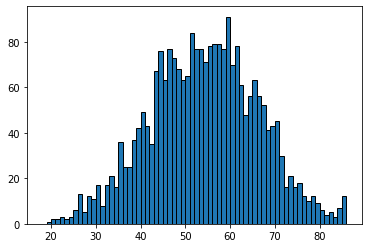

In [7]:
plt.hist(df["age"], edgecolor = "black", bins = np.arange(18, 87));

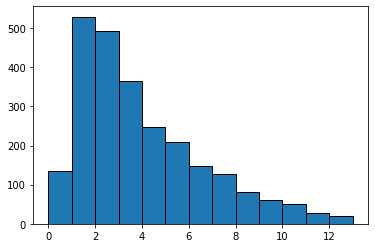

In [8]:
plt.hist(df["adjusted_size_ratio"], edgecolor = "black", bins = np.arange(0, 14));